# 01. Importing libraries

In [1]:
# Import libraries
import warnings
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from pandas.core.common import SettingWithCopyWarning
from scipy.stats import norm

# 02. Importing data

In [2]:
# Define csv path
path = r'C:\Users\lucav\Desktop\Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_merged.pkl'
warnings.simplefilter(action='ignore', category=FutureWarning) # Added to ignore warnings
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged.pkl'))

# 03. Deriving new variables

In [4]:
# Create a subset with the first one million rows of 'ords_prods_merged'
df = ords_prods_merged[:1000000]

In [5]:
# Define a function called 'price_label' to label each product based on its price
def price_label(row):

    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    elif row['prices'] > 15:
        return 'High range'
    else: 
        return 'Not enough data'

In [6]:
# Apply the 'price_label' function to all rows (axis = 1) and return the results in a new column called 'price_range'
df['price_range'] = df.apply(price_label, axis=1)

<ipython-input-6-b698fc0c695d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [7]:
# Count the values in the 'price_range' column
df['price_range'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [8]:
# Check what the highest price in 'prices' column is
df['prices'].max()

14.8

In [9]:
# Apply the above conditional logic using loc() instead of an if statement and return the results in 'price_range_loc' column
# First condition
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'
# Second condition
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'
# Third condition
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

C:\Users\lucav\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\lucav\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\lucav\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [10]:
# Count the values in the 'price_range_loc' column
df['price_range_loc'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range_loc, dtype: int64

In [11]:
# Apply the conditional logic using loc() to the entire 'ords_prods_merged' dataframe
# First condition
ords_prods_merged.loc[ords_prods_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'
# Second condition
ords_prods_merged.loc[(ords_prods_merged['prices'] <= 15) & (ords_prods_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'
# Third condition
ords_prods_merged.loc[ords_prods_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [12]:
# Count the values in the 'price_range_loc' column
ords_prods_merged['price_range_loc'].value_counts(dropna = False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

In [13]:
# Return the frequency for each day of the week to identify the busiest and slowest days
ords_prods_merged['day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: day_of_week, dtype: int64

The day with the highest frequency is 0, that corresponds to **Saturday**.
The day with the lowest frequency is 4, that corresponds to **Wednesday**.

In [14]:
# Create a for-loop to run through every row in 'day_of_week' and compare the values to 0 and 4
result = []

for value in ords_prods_merged["day_of_week"]:
    if value == 0:
        result.append("Busiest day")
    elif value == 4:
        result.append("Least busy")
    else:
        result.append("Regularly busy")

In [15]:
# Create a new column 'busiest_day' within 'ords_prods_merged' dataframe and set it equal to 'result'
ords_prods_merged['busiest_day'] = result

In [16]:
# Count the values in the 'busiest_day' column
ords_prods_merged['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

# 04. Task

## I. Complete the instructions in the exercise for creating the “price_label” and “busiest_day” columns

Completed above. See "**03. Deriving new variables**".

## II. Label the *two* busiest and slowest days

Looking at the frequency of each day computed above, the two days with the highest frequencies are 0 and 1 while the two days with the lowest frequencies are 3 and 4.

In [17]:
# Create a for-loop to run through every row in 'day_of_week' and compare the values to 0, 1 and 3, 4
result = []

for value in ords_prods_merged["day_of_week"]:
    if value == 0 or value == 1:
        result.append("Busiest days")
    elif value == 4 or value == 3:
        result.append("Slowest days")
    else:
        result.append("Regularly busy")

In [18]:
# Rename 'busiest_day' column to 'busiest_days'
ords_prods_merged.rename(columns = {'busiest_day' : 'busiest_days'}, inplace = True)

In [19]:
# Set column 'busiest_days' equal to 'result'
ords_prods_merged['busiest_days'] = result

## III. Check the values of this new column for accuracy

In [20]:
# Count the values in the 'busiest_days' column
ords_prods_merged['busiest_days'].value_counts(dropna = False)

Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: busiest_days, dtype: int64

The results are in line with the frequencies previously computed.

In [21]:
# Print the first 50 rows of 'ords_prods_merged'
ords_prods_merged.head(50)

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Busiest days
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid-range product,Busiest days
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days


## IV. identify the busiest hours of the day

In [22]:
# Return the frequency for each hour of the day to identify the busiest and slowest hours
ords_prods_merged['hour_of_day'].value_counts(dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: hour_of_day, dtype: int64

In [23]:
# Calculate the mean and standard deviation of 'hour_of_day'
mu = ords_prods_merged['hour_of_day'].mean()
sigma = ords_prods_merged['hour_of_day'].std()

In [24]:
# Create a list of tuples 'hour_frequency' where each hour is associated with its frequency
hour = ords_prods_merged['hour_of_day'].value_counts(dropna = False).index.tolist()
frequency = ords_prods_merged['hour_of_day'].value_counts(dropna = False).tolist()
hour_frequency = [(hour[i], frequency[i]) for i in range(0, len(hour))]

# Sort 'hour_frequency' based on hour, from smallest to largest
hour_frequency.sort()

In [25]:
# Create a list 'hour_freq_final' where the tuples are sorted to have the mean of 'hour_of_day' (mu) in the center

# Create a list containing values to the right of mu
hour_frequency_right = []

# Create a list containing values to the left of mu
hour_frequency_left = []

# Fill 'hour_frequency_right'
for a in range(0, len(hour_frequency)):
    if hour_frequency[a][0] >= mu and len(hour_frequency_right) < len(hour_frequency) / 2:
        hour_frequency_right.append(hour_frequency[a])

b = 0
while b < mu and len(hour_frequency_right) < len(hour_frequency) / 2:
    hour_frequency_right.append(hour_frequency[b])
    b = b + 1

# Fill 'hour_frequency_left'
for i in hour_frequency:
    if i in hour_frequency_right:
        pass
    else:
        hour_frequency_left.append(i)

# Create the final list 'hour_freq_final' containing the left part and right part        
hour_freq_final = hour_frequency_left + hour_frequency_right

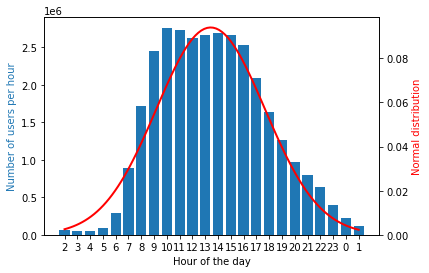

In [26]:
# Create a plot with a bar chart and its normal distribution

# Initialize a list containing x-axis values
ind = []

# Initialize a list containing y-axis values
fre = []

# Fill 'ind' and 'fre'
for item in hour_freq_final:
    ind.append(str(item[0]))
    fre.append(item[1])

# Define a parameter to account for the shift on the x-axis
x_axis_shift = int(ind[0])

# Create a subplot
fig, ax1 = plt.subplots()

# Plot the bar chart on the primary y-axis
plt.bar(ind, fre, color = 'tab:blue')

# Add a secondary y-axis
ax2 = ax1.twinx()

# Plot the normal distribution on the secondary y-axis
xmin = min(hour)
xmax = max(hour)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu - x_axis_shift, sigma)
ax2.plot(x, p, 'r', linewidth = 2)
ax2.set_ylim(ymin = 0)

# Add axes labels
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Number of users per hour', color = 'tab:blue')
ax2.set_ylabel('Normal distribution', color = 'r')

# Display plot
plt.show()

In [27]:
# Create a for-loop to run through every row in 'hour_of_day' and evaluate the hour based on the 68%-95% rule
result2 = []
busiest_hours = []
regular_hours = []
slowest_hours = []

for value in ords_prods_merged['hour_of_day']:
    # Check if the hour falls within 68% and label it as 'Most orders'
    if value >= round(mu - sigma) and value <= round(mu + sigma):
        result2.append("Most orders")
        busiest_hours.append(value)
    # Check if the hour falls within 68% and 95% (below the mean) and label it as 'Average orders'
    elif value >= round(mu - 2 * sigma) and value < round(mu - sigma):
        result2.append("Average orders")
        regular_hours.append(value)
    # Check if the hour falls within 68% and 95% (above the mean) and label it as 'Average orders'
    elif value > round(mu + sigma) and value <= round(mu + 2 * sigma):
        result2.append("Average orders")
        regular_hours.append(value)
    # Label any other hour as 'Fewest orders'
    else:
        result2.append("Fewest orders")
        slowest_hours.append(value)
        
# Create lists containing only unique values
busiest_hours = list(set(busiest_hours))
regular_hours = list(set(regular_hours))
slowest_hours = list(set(slowest_hours))

# Print the different hours
print("Busiest hours: ", end = '')
print(*busiest_hours, sep = ', ')
print("Regularly busy hours: ", end = '')
print(*regular_hours, sep = ', ')
print("Slowest hours: ", end = '')
print(*slowest_hours, sep = ', ')

Busiest hours: 9, 10, 11, 12, 13, 14, 15, 16, 17, 18
Regularly busy hours: 5, 6, 7, 8, 19, 20, 21, 22
Slowest hours: 0, 1, 2, 3, 4, 23


In [28]:
# Create a new column 'busiest_period_of_day' within 'ords_prods_merged' dataframe and set it equal to 'result2'
ords_prods_merged['busiest_period_of_day'] = result2

## V. Print the frequency for this new column

In [29]:
# Count the values in the 'busiest_period_of_day' column
ords_prods_merged['busiest_period_of_day'].value_counts(dropna = False)

Most orders       24842227
Average orders     6651949
Fewest orders       910683
Name: busiest_period_of_day, dtype: int64

## VI. Export 'orders_products_merged' as 'orders_products_merged_frequencies.pkl'

In [30]:
ords_prods_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_frequencies.pkl'))